In [1]:
import numpy as np
import pandas as pd
from Stat_func import * 

In [2]:
tau_data = pd.read_csv("tau_data.csv")
f = tau_data['Force'].values
tau_calc = tau_data['Dissoc_Time_Tau'].values
tau_calc = tau_calc * 1e12

# Compute log-log transform
log_log_tau_calc = np.log(np.log(tau_calc))

# Define range for smooth predictions
ftau = np.linspace(0, 650, 100)

In [3]:
# Perform initial fit
a, b, ci, predicted_log_log_tau, pred_interval = fit_with_intervals(f, log_log_tau_calc)

# Calculate dissociation time at f=0 for original data
tau_at_f0 = calculate_dissociation_time(b)

In [4]:
# Exclude outliers and refit for filtered data
a_filtered, b_filtered, filtered_f, filtered_log_log_tau, pred_interval_filtered = exclude_outliers_and_refit(
    f, log_log_tau_calc, predicted_log_log_tau, pred_interval
)

# Calculate dissociation time at f=0 for filtered data
tau_at_f0_filtered = calculate_dissociation_time(b_filtered)

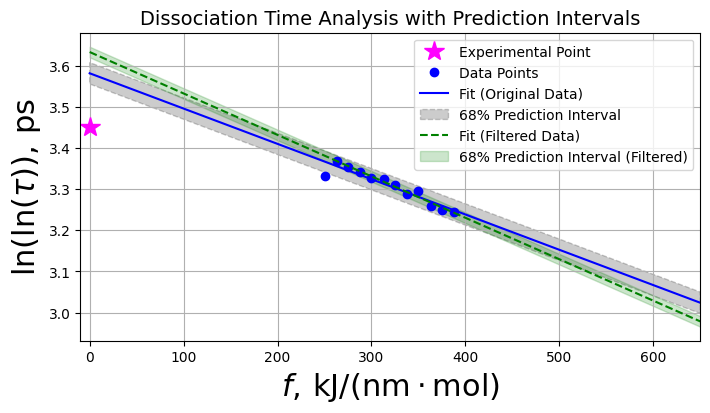

In [5]:
plot_dissociation_data(
    f, log_log_tau_calc, ftau, a, b, predicted_log_log_tau, pred_interval,
    a_filtered=a_filtered, b_filtered=b_filtered, pred_interval_filtered=pred_interval_filtered,
)

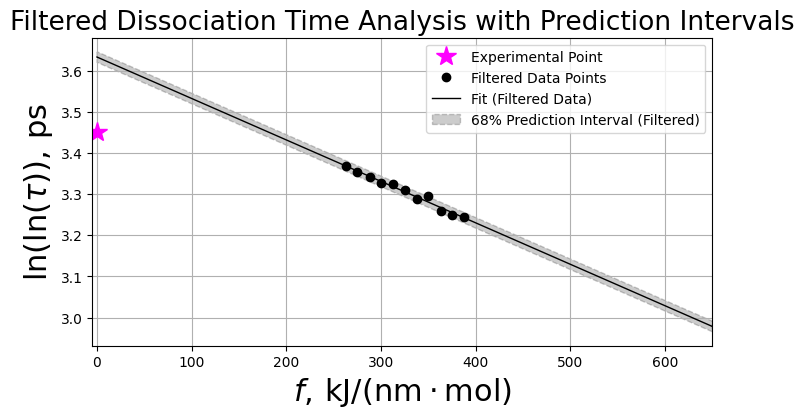

In [6]:
# Plot the filtered dissociation data
plot_filtered_dissociation_data(
    f, log_log_tau_calc, ftau, filtered_f, filtered_log_log_tau,
    pred_interval_filtered, a_filtered, b_filtered, FS=22
)

In [7]:
print("Linear fit parameters (all data): a =", a, ", b =", b)
print("Confidence interval (all data):", ci)
print("Dissociation time at f=0 (all data):", tau_at_f0)
print("Linear fit parameters (filtered data): a =", a_filtered, ", b =", b_filtered)
print("Dissociation time at f=0 (filtered data):", tau_at_f0_filtered)

Linear fit parameters (all data): a = -0.0008588411168817256 , b = 3.5819859686371145
Confidence interval (all data): [4.70359900e-05 1.51413643e-02]
Dissociation time at f=0 (all data): 4079.92648526077
Linear fit parameters (filtered data): a = -0.001008158526111913 , b = 3.633654480941704
Dissociation time at f=0 (filtered data): 27443.055003197576


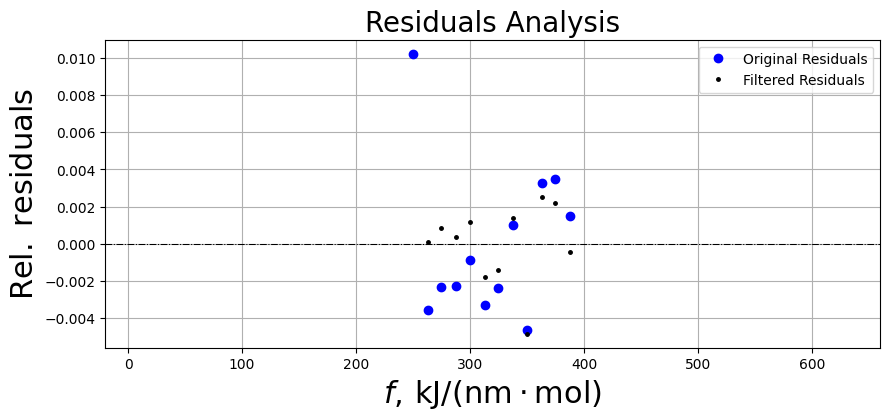

In [16]:
# Calculate relative residuals for original and filtered data
rel_res = (predicted_log_log_tau - log_log_tau_calc) / log_log_tau_calc
filtered_predicted_log_log_tau = a_filtered * filtered_f + b_filtered
rel_res_filtered = (filtered_predicted_log_log_tau - filtered_log_log_tau) / filtered_log_log_tau
# Plot residuals as an additional analysis
plot_residuals(f, rel_res, filtered_f, rel_res_filtered, FS=22)

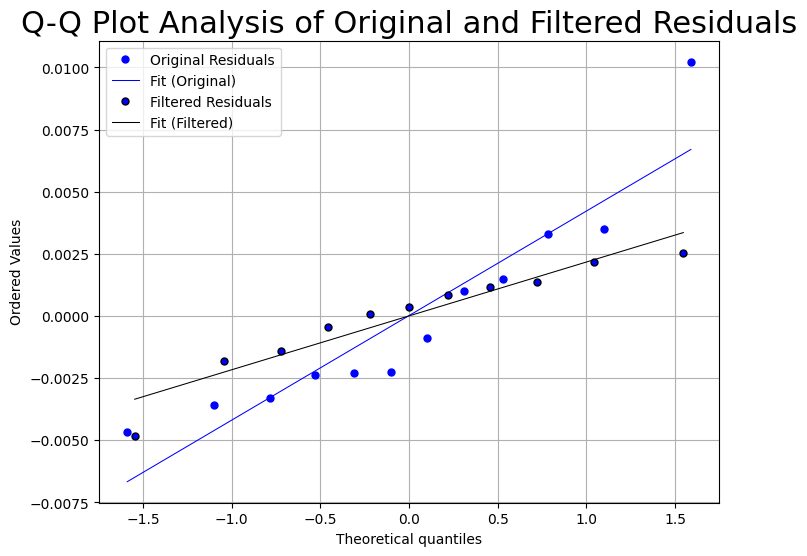

In [18]:
# plot_qq(rel_res, rel_res_filtered, FS=22)
plot_qq2in1(rel_res, rel_res_filtered)

In [25]:
# Оценка значения и неопределенности для всех точек
sigma = pred_interval  # Используем pred_interval для оценки σ
Gens = b + sigma * np.random.randn(int(1e6))  # Генерация случайных значений
TAU = np.exp(np.exp(Gens)) * 1e-12
tau = np.median(TAU)  # Экстраполированное значение tau(0)
print("Extrapolated tau(0) for all points:", tau)

# Симметричный MAD
mad_symmetric = np.median(np.abs(TAU - tau))
print("Symmetric MAD:", mad_symmetric)
print("tau - mad_symmetric:", tau - mad_symmetric)
print("tau + mad_symmetric:", tau + mad_symmetric)

Extrapolated tau(0) for all points: 4083.823981104441
Symmetric MAD: 2323.5435418015068
tau - mad_symmetric: 1760.2804393029342
tau + mad_symmetric: 6407.367522905948


In [21]:
# Положительные отклонения
TAUp = TAU[TAU > tau]
madp = np.median(np.abs(TAUp - tau))
print("Asymmetric MAD (positive):", madp)
print("tau + madp:", tau + madp)

# Отрицательные отклонения
TAUm = TAU[TAU < tau]
madm = np.median(np.abs(TAUm - tau))
print("Asymmetric MAD (negative):", madm)
print("tau - madm:", tau - madm)

Asymmetric MAD (positive): 3657.1195229992713
tau + madp: 7741.973659386085
Asymmetric MAD (negative): 1905.8702965989812
tau - madm: 2178.983839787833


In [22]:
# Повторная оценка без выбросов (95% доверительный интервал)
sigma_filtered = pred_interval_filtered / 2
Gens_filtered = b_filtered + sigma_filtered * np.random.randn(int(1e6))
TAU_filtered = np.exp(np.exp(Gens_filtered)) * 1e-12
tau_filtered = np.median(TAU_filtered)
print("Extrapolated tau(0) without outliers:", tau_filtered)

# Симметричный MAD для фильтрованных данных
mad_symmetric_filtered = np.median(np.abs(TAU_filtered - tau_filtered))
print("Symmetric MAD (filtered):", mad_symmetric_filtered)
print("tau_filtered - mad_symmetric_filtered:", tau_filtered - mad_symmetric_filtered)
print("tau_filtered + mad_symmetric_filtered:", tau_filtered + mad_symmetric_filtered)

Extrapolated tau(0) without outliers: 27442.855179018956
Symmetric MAD (filtered): 4498.612796762622
tau_filtered - mad_symmetric_filtered: 22944.242382256336
tau_filtered + mad_symmetric_filtered: 31941.467975781576


In [23]:
# Положительные отклонения для фильтрованных данных
TAUp_filtered = TAU_filtered[TAU_filtered > tau_filtered]
madp_filtered = np.median(np.abs(TAUp_filtered - tau_filtered))
print("Asymmetric MAD (positive, filtered):", madp_filtered)
print("tau_filtered + madp_filtered:", tau_filtered + madp_filtered)

# Отрицательные отклонения для фильтрованных данных
TAUm_filtered = TAU_filtered[TAU_filtered < tau_filtered]
madm_filtered = np.median(np.abs(TAUm_filtered - tau_filtered))
print("Asymmetric MAD (negative, filtered):", madm_filtered)
print("tau_filtered - madm_filtered:", tau_filtered - madm_filtered)

Asymmetric MAD (positive, filtered): 4947.689721504401
tau_filtered + madp_filtered: 32390.544900523357
Asymmetric MAD (negative, filtered): 4163.200292826592
tau_filtered - madm_filtered: 23279.654886192366
